In [61]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re

In [62]:
df=pd.read_csv("data.csv")

In [63]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [64]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [65]:
df.drop(columns=['Place of Review','Month','Reviewer Name','Up Votes','Down Votes','Review Title'], inplace=True)
df

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...
8513,NaN,5
8514,NaN,2
8515,NaN,4
8516,NaN,1


In [66]:
df.dropna(subset='Review text',inplace=True)
df

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...
8505,Delivered before time but price is high from m...,3
8506,up to the mark but same is available in market...,4
8507,Nice delivery speedREAD MORE,5
8508,No complaints about the item . Its the best on...,5


In [67]:
df.isnull().sum()

Review text    0
Ratings        0
dtype: int64

In [68]:
df

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...
8505,Delivered before time but price is high from m...,3
8506,up to the mark but same is available in market...,4
8507,Nice delivery speedREAD MORE,5
8508,No complaints about the item . Its the best on...,5


In [69]:
df['label'] = df['Ratings'].apply(lambda x: 1 if x >3 else 0)
df

,Review text,Ratings,label
0,"Nice product, good quality, but price is now r...",4,1
1,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,Worst product. Damaged shuttlecocks packed in ...,1,0
3,"Quite O. K. , but nowadays the quality of the...",3,0
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0
...,...,...,...
8505,Delivered before time but price is high from m...,3,0
8506,up to the mark but same is available in market...,4,1
8507,Nice delivery speedREAD MORE,5,1
8508,No complaints about the item . Its the best on...,5,1


In [70]:
df['Review text'] = df['Review text'].replace(to_replace=r'READ', value='', regex=True)
df

,Review text,Ratings,label
0,"Nice product, good quality, but price is now r...",4,1
1,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,Worst product. Damaged shuttlecocks packed in ...,1,0
3,"Quite O. K. , but nowadays the quality of the...",3,0
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0
...,...,...,...
8505,Delivered before time but price is high from m...,3,0
8506,up to the mark but same is available in market...,4,1
8507,Nice delivery speed MORE,5,1
8508,No complaints about the item . Its the best on...,5,1


In [71]:
df.drop_duplicates(inplace=True)
df

,Review text,Ratings,label
0,"Nice product, good quality, but price is now r...",4,1
1,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,Worst product. Damaged shuttlecocks packed in ...,1,0
3,"Quite O. K. , but nowadays the quality of the...",3,0
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0
...,...,...,...
8505,Delivered before time but price is high from m...,3,0
8506,up to the mark but same is available in market...,4,1
8507,Nice delivery speed MORE,5,1
8508,No complaints about the item . Its the best on...,5,1


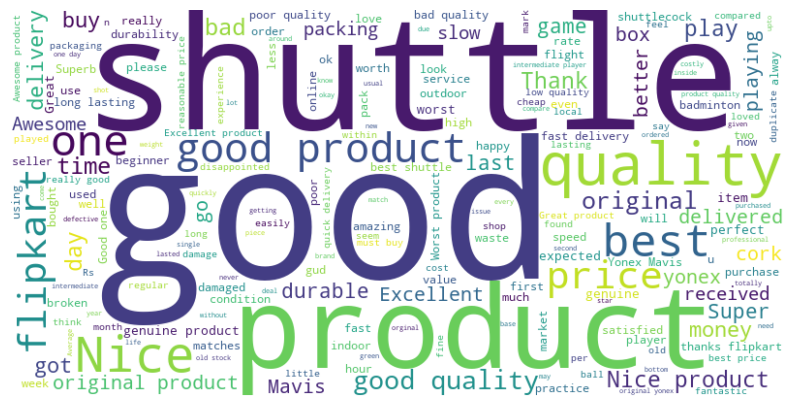

In [72]:
from wordcloud import WordCloud
df = df[df['Review text'].notna()]
text = ' '.join(df['Review text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [73]:
df["label"].value_counts()

label
1    3849
0    1392
Name: count, dtype: int64

In [74]:
X=df[["Review text"]]
Y=df["label"]

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

# train preprocessing

In [76]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
v=nltk.download("stopwords")
nltk.download("wordnet")
len(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


179

In [77]:
lemmatizer = WordNetLemmatizer()
english_stopwords = set(stopwords.words('english'))
negation_words = {'not', 'no', 'nor', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","don","don't","over"}
custom_stopwords = english_stopwords - negation_words

In [78]:
def preprocess(raw_text):
    sentence = re.sub("[^a-zA-Z]", " ", str(raw_text))
    
    sentence = sentence.lower()

    tokens = sentence.split()
            
    clean_tokens = [t for t in tokens if t not in custom_stopwords]
    
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return " ".join(clean_tokens)


In [79]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
X_preprocess = X_train['Review text'].progress_apply(lambda x: preprocess(x))
X_preprocess

100%|████████████████████████████████████████████████████████████████████████████| 4192/4192 [00:00<00:00, 9582.84it/s]


2858    got genuine product even import stamp say dece...
1644                                                super
7336                                            nice deal
6936                                    good nice product
4502                                                  bad
                              ...                        
5088    item look duplicate doesn look original shuttl...
6233                                   varry good product
8459                                            condition
8495           thanks delivery boy service always awesome
1251                                  got bad quality one
Name: Review text, Length: 4192, dtype: object

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
vocab= TfidfVectorizer()

In [82]:
X_train_bow =vocab.fit_transform(X_preprocess)
X_train_bow

<4192x2207 sparse matrix of type '<class 'numpy.float64'>'
	with 19250 stored elements in Compressed Sparse Row format>

# test preprocessing

In [83]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
X_samples = X_test['Review text'].progress_apply(lambda x: preprocess(x))
X_samples

100%|███████████████████████████████████████████████████████████████████████████| 1049/1049 [00:00<00:00, 12411.42it/s]


2918                                    item note quality
5842                                          nice n good
1724            good long lasting flight shuttlecock good
7770                                 delivered right time
1370                                         mind blowing
                              ...                        
3116                      bad product shuttle low quality
1250                                            super hit
5143    worthy product durable outdoor practice nice p...
5986                                        good delivery
437                 awesome got price thank much flipkart
Name: Review text, Length: 1049, dtype: object

In [84]:
X_testing=vocab.transform(X_samples)
X_testing.shape

(1049, 2207)

# Evaluation

In [85]:
from sklearn.svm import SVC
C = 1
kernel = 'rbf'  
classifier = SVC(C=C, kernel=kernel)
classifier.fit(X_train_bow, y_train)

SVC(C=1)

In [86]:
y_test_pred = classifier.predict(X_testing)
y_test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classifier.score(X_train_bow, y_train))
print(classification_report(y_test, y_test_pred))

0.8703527168732126
0.9496660305343512
              precision    recall  f1-score   support

           0       0.84      0.66      0.74       293
           1       0.88      0.95      0.91       756

    accuracy                           0.87      1049
   macro avg       0.86      0.81      0.83      1049
weighted avg       0.87      0.87      0.87      1049



# testing

In [88]:
sample="worth it" 
test = pd.DataFrame({'sample': [sample]})
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
X_sample = test["sample"].progress_apply(lambda x: preprocess(x))
X_sample

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 999.36it/s]


0    worth
Name: sample, dtype: object

In [89]:
pred=classifier.predict(vocab.transform(X_sample))[0]
if pred==1:
    print("Positive")
else:
    print("negative")

Positive


## MLFLOW Integration by running different experiments

In [92]:
import mlflow
import warnings
from sklearn.exceptions import ConvergenceWarning 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
mlflow.set_experiment("sentiment_analysis")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
pipelines = { 
    'svc' : Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', MultinomialNB())
    ])
}


param_grids = {
    'svc': [
        {
            'vectorizer': [TfidfVectorizer(), CountVectorizer()],
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'vectorizer': [TfidfVectorizer(), CountVectorizer()],
            'classifier__kernel' : ['poly'], 
            'classifier__degree' : [2, 3, 4, 5], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'vectorizer': [TfidfVectorizer(), CountVectorizer()],
            'classifier__kernel' : ['linear'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'logistic_regression': [
        {
            'vectorizer': [TfidfVectorizer(), CountVectorizer()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'vectorizer': [TfidfVectorizer(), CountVectorizer()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'vectorizer': [TfidfVectorizer(), CountVectorizer()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            'vectorizer': [TfidfVectorizer(), CountVectorizer()],
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
            'vectorizer': [TfidfVectorizer(), CountVectorizer()],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {
            'vectorizer': [TfidfVectorizer(), CountVectorizer()]
        }
    ]
}

2024/03/27 09:53:51 INFO mlflow.tracking.fluent: Experiment with name 'sentiment_analysis' does not exist. Creating a new experiment.


In [93]:
best_models = {}


for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_preprocess, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_samples, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** svc **********


2024/03/27 09:53:57 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logged at level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/03/27 09:53:57 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: total: 7min 58s
Wall time: 14min 35s
Train Score:  0.88334646598832
Test Score:  0.8703527168732126

********** logistic_regression **********


2024/03/27 10:08:34 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 2min 9s
Wall time: 3min 41s
Train Score:  0.8847767401241959
Test Score:  0.8627264061010487

********** random_forest **********


2024/03/27 10:12:16 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 5min 31s
Wall time: 10min 40s
Train Score:  0.8821534330277263
Test Score:  0.8674928503336511

********** decision_tree **********


2024/03/27 10:22:57 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 13 s
Wall time: 29.3 s
Train Score:  0.8592528325287805
Test Score:  0.8570066730219257

********** naive_bayes **********


2024/03/27 10:23:27 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


CPU times: total: 2.47 s
Wall time: 10.8 s
Train Score:  0.8702299305059723
Test Score:  0.86558627264061



## Experiment tracking

<img src="mlflow and prefect ui/mlflow1.png" width="80%" height="50%">

## How to rename Experiment

<img src="mlflow and prefect ui/mlflow2.png" width="80%" height="50%">

## Metrics plots

<img src="mlflow and prefect ui/mlflow3.png" width="80%" height="50%">

<img src="mlflow and prefect ui/mlflow4.png" width="80%" height="50%">

### by above observation SVC has better training and test scores

## hyperparameter plot(SVC)

<img src="mlflow and prefect ui/mlflow5.png" width="100%" height="80%">

#### by above it observation it seems that SVC has more best fit models and best hyperparametrs are "classifier_kernel":'rbf',  classifier_degree:3,  classifier_C:1,   best vectorizer:tfidf

# Model management/Registry of models

### Three stages of production

<img src="mlflow and prefect ui/mlflow6.png" width="100%" height="80%">

### Version 5 is in a product phase

## Overview of best model parameters and their metrices

<img src="mlflow and prefect ui/mlflow7.png" width="100%" height="80%">

## Artifacts of best model

<img src="mlflow and prefect ui/mlflow8.png" width="100%" height="80%">

## best model Training and testing score

<img src="mlflow and prefect ui/mlflow9.png" width="100%" height="80%">